<a href="https://colab.research.google.com/github/MatheusRobles/Santander_Coders_Tecnicas_de_Prog_II/blob/main/Ex_Aula_2/Exercicios_Aula2_Estrutura_tecnicas_de_prog_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/2004-2021.tsv', sep = '\t')

In [17]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


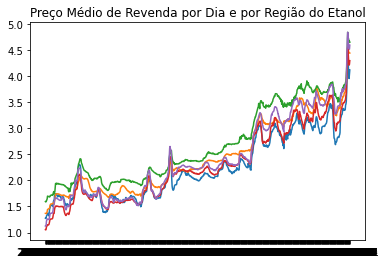

In [18]:
etanol_df = df[df['PRODUTO'] == 'ETANOL HIDRATADO']
etanol_pivot = etanol_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='DATA FINAL', columns='REGIÃO')
for coluna in etanol_pivot.columns:
    plt.plot(etanol_pivot.index, etanol_pivot[coluna], label=coluna)

plt.title('Preço Médio de Revenda por Dia e por Região do Etanol')
plt.show()

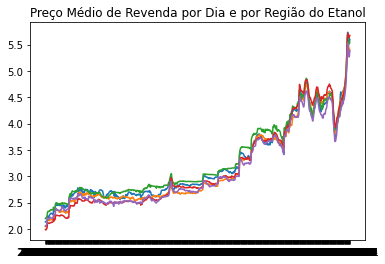

In [19]:
etanol_df = df[df['PRODUTO'] == 'GASOLINA COMUM']
etanol_pivot = etanol_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='DATA FINAL', columns='REGIÃO')
for coluna in etanol_pivot.columns:
    plt.plot(etanol_pivot.index, etanol_pivot[coluna], label=coluna)

plt.title('Preço Médio de Revenda por Dia e por Região do Etanol')
plt.show()

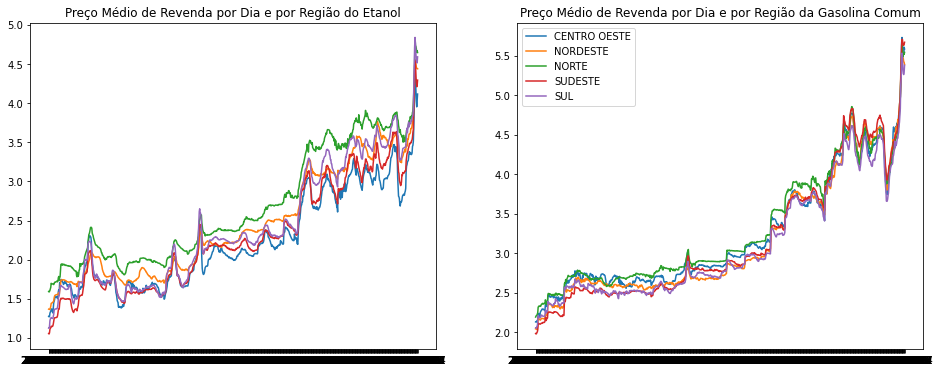

In [20]:
etanol_df = df[df['PRODUTO'] == 'ETANOL HIDRATADO']
etanol_pivot = etanol_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='DATA FINAL', columns='REGIÃO')

gasolina_df = df[df['PRODUTO'] == 'GASOLINA COMUM']
gasolina_pivot = gasolina_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='DATA FINAL', columns='REGIÃO')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

for coluna in etanol_pivot.columns:
    ax1.plot(etanol_pivot.index, etanol_pivot[coluna], label=coluna)

ax1.set_title('Preço Médio de Revenda por Dia e por Região do Etanol')

for coluna in gasolina_pivot.columns:
    ax2.plot(gasolina_pivot.index, gasolina_pivot[coluna], label=coluna)

ax2.set_title('Preço Médio de Revenda por Dia e por Região da Gasolina Comum')

plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

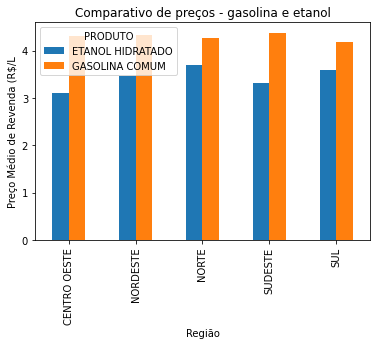

In [15]:
df['DATA FINAL'] = pd.to_datetime(df['DATA INICIAL'])
df_2020 = df[df['DATA FINAL'].dt.year == 2020]

# Filtrar os dados apenas para os produtos etanol e gasolina
etanol_gasolina_df = df_2020[df_2020['PRODUTO'].isin(['ETANOL HIDRATADO', 'GASOLINA COMUM'])]

# Calcular o preço médio de revenda para cada produto e região
etanol_gasolina_mean = etanol_gasolina_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='REGIÃO', columns='PRODUTO')

# Plotar um gráfico de barras com o preço médio de cada produto e região
plt.figure(figsize=(12, 8))
etanol_gasolina_mean.plot(kind='bar')
plt.title('Comparativo de preços - gasolina e etanol')
plt.xlabel('Região')
plt.ylabel('Preço Médio de Revenda (R$/L')
plt.show()